# Исследование закономерностей, определяющих успешность компьютерной игры.

#### Описание работы :

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Чтобы выявить потенциально популярный продукт и как следствие правильно спланировать рекламные кампании, необходимо определить закономерности характерные для успешной игры. 

На основании выявленных закономерностей и данных за 2016 год нужно спрогнозировать продажи на 2017 год, отработав принцип работы с данными таким образом, чтобы в будущем можно было делать прогноз на следующий год, исходя из данных предыдущего. 

#### Описание данных :

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### План работы над проектом :

   1. [Обзор и загрузка данных.](#Step_1)
   2. [Подготовка данных:](#Step_2)
       * [Приведение названий столбцов к нижнему регистру.](#Step_2_1)
       * [Обработка пропусков.](#Step_2_2)
       * [Преобразование данных в нужные типы.](#Step_2_3)
       * [Обработка дубликатов.](#Step_2_4)
       * [Расчёт суммарных продаж во всех регионах.](#Step_2_5)     
   3. [Анализ данных:](#Step_3)    
       * [Оценка количества игр, выпущенных в разные годы.](#Step_3_1)
       * [Оценка динамики продаж по платформам.](#Step_3_2)
       * [Определение актуального периода. Выбор нескольких потенциально прибыльных платформ.](#Step_3_3)
       * [Диаграмма размаха по глобальным продажам игр в разбивке по платформам.](#Step_3_4)
       * [Оценка влияния на продажи отзывов пользователей и критиков.](#Step_3_5)
       * [Анализ влияния отзывов пользователей и критиков на продажи игр на других платформах.](#Step_3_6)
       * [Анализ распределения игр по жанрам.](#Step_3_7)
   4. [Составление портрета пользователя для каждого региона.](Step_4)
       * [Самые популярные платформы (топ-5). Различия в долях продаж.](#Step_4_1)
       * [Самые популярные жанры (топ-5). Оценка разницы.](#Step_4_2)
       * [Влияние рейтинга ESRB на продажи в отдельном регионе.](#Step_4_3)
   5. [Проверка гипотез:](#Step_5)
       * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#Step_5_1)
       * [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#Step_5_2)
   6. [Общий вывод.](#Step_6)

### Шаг 1. Обзор и загрузка данных. <a id="Step_1"></a>

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными и изучим общую информацию.

In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
display(data)
data.info()
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Рассмотрим более подробно каждый столбец фрейма `data`:

* `Name` — название игры. Пара отсутствующих значений. Можно будет удалить. 
* `Platform` — платформа. Всё на месте.  
* `Year_of_Release` — год выпуска. 269 пропущенных значений. Это всего лишь 1,6 % общего числа. При необходимости можно будет спокойно удалить соотвествующие этим пропускам строки. Делать это или нет решим в процессе выполнения работы. Если говорить о причинах появление этих пропусков, то либо это сбой автоматики: при формировании/загрузке/выгрузке данных, либо человеческий фактор: некорретная обработка/занесение информации. 
* `Genre` — жанр игры. Также как и `Name` нехватает двух значений. 
* `NA_sales`,`EU_sales`,`JP_sales`,`Other_sales` — продажи в Северной Америке, Европе, Японии и других странах мира соответственно (миллионы проданных копий). Пропусков нет. 
* `Critic_Score` и `User_Score` — оценка критиков (максимум 100) и пользователей (максимум 10) соответственно. В данном случае наличие пропусков можно объяснить либо отсутствием оценки как таковой, либо отсутствием данных об оценке в распоряжении у заказчика, который направил этот датасет, либо какой-то сбой при работе с данными перед их отправкой со стороны автоматики/человеческого фактора. В любом случае, в реальной ситуации, этот вопрос было бы необходимо прояснять с заказчиком максимально детально, потому что метрика крайне важная, а отсутствие данных - значительное. Также, необходимо изменить тип данных столбца `User_Score` на `float`.
* `Rating` — рейтинг от организации ESRB. Скорее всего, просто не все игры его получили по тем или иным причинам, отсюда и такое число пропусков. 
    
    



#### Результат выполнения 1 шага "Обзор и загрузка данных":
*Данные успешно загружены, проведён их первичный анализ, определены необходимые действия для последующей корректной подготовки и предобработки имеющейся информации.*

### Шаг 2. Подготовка данных. <a id="Step_2"></a>

*2.1. Приведение названий столбцов к нижнему регистру.* <a id="Step_2_1"></a>

In [4]:
data.columns = map(str.lower, data.columns)

*2.2. Обработка пропусков.* <a id="Step_2_2"></a>

В столбце `name` и `genre` пропущенно по 2 значения. Тут всё просто - удалим их.

Столбец `year_of_release` - год выпуска - наша ключевая метрика, без него вести какой-то анализ, в рамках данной задачи, мероприятие крайне сомнительное. 1,6 % пропусков от общего числа данных это то от чего можно просто избавиться, сильно при этом не потеряв.

In [5]:
data.dropna(subset = ['name','genre','year_of_release'], inplace = True) 

А вот, что касается трёх последних столбцов с рейтингом, тут не всё так однозначно. Пока, всё выглядит так, что, исходя из контекста поставленных задач, изобретать велосипед и стараться заполнить пропуски самостоятельно (средним/медианой/с опорой на какой-то признак) идея так себе. Вероятно, имеющихся данных нам должно хватить для ответа на поставленные вопросы. Если, на каком-то этапе выполнения работы, станет понятно, что это не так, то у нас всегда остаётся возможность для манёвра и работы с пропущенными значения. Об удалении такого количества строк, конечно же, и речи быть не может. 

*2.3. Преобразование данных в нужные типы.* <a id="Step_2_3"></a>

Столбец `year_of_release`. В нём размещены даты, но так как нам понадобится только год, то изменим тип данных на `Int64`.

In [6]:
data['year_of_release'] = data['year_of_release'].astype('int')

Столбец `user_score`. Прежде, чем приступить к изменению типа данных, проверим его на наличие `tbd`.

In [7]:
len(data.query('user_score == "tbd"'))

2376

Не мало. Но проблема в том, что де факто, рейтинг, который находится в процессе обсуждения, это рейтинг, которого нет.
Поэтому при изменении типа данных, учтём это, заменив значения `tbd` на `NaN`.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

Проверим наличие `tbd` после изменения типа данных. 

In [9]:
len(data.query('user_score == "tbd"'))

0

*2.4. Обработка дубликатов.* <a id="Step_2_4"></a>

Проверим фрейм на наличие полных дубликатов.

In [10]:
print(data.duplicated().sum()) 

0


Полностью дублирующих друг друга строк не обнаружено. На всякий случай убедимся, что названия игр тоже не повторяются.

In [11]:
data['name'].value_counts()

Need for Speed: Most Wanted               12
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
Terraria                                   8
                                          ..
Hexyz Force                                1
LEGO Island 2: The Brickster's Revenge     1
Are You Alice?                             1
The Sims: Superstar                        1
Sakura Wars: Atsuki Chishio Ni             1
Name: name, Length: 11426, dtype: int64

Воу. Хьюстон... Ну вы поняли. 

Так, проверим сколько раз повторяются суммарно названия всех игр и сколько всего игр, названия которых повторяются :D

In [12]:
data['name'].value_counts().reset_index().query('name > 1').sum()

index    Need for Speed: Most WantedFIFA 14LEGO Marvel ...
name                                                  7766
dtype: object

In [13]:
data['name'].value_counts().reset_index().query('name > 1').count()

index    2748
name     2748
dtype: int64

Итого. У нас 2805 игр, названия которых повторяются. Суммарно они все вместе составляют 7959 строчек. Вычитая одно из другого получаем, что лишних строчек у нас 5154 штуки.

Рассмотрим на примере самой частоповторяющийся игры `Need for Speed: Most Wanted`, что же эти дубликаты из себя представляют.

In [14]:
(data.pivot_table(index = ['year_of_release','name', 'platform'])
 .query('name == "Need for Speed: Most Wanted"'))

critic_score  eu_sales  \
year_of_release name                        platform                           
2005            Need for Speed: Most Wanted DS                45.0      0.01   
                                            GBA                NaN      0.07   
                                            GC                80.0      0.11   
                                            PC                82.0      0.23   
                                            PS2               82.0      1.79   
                                            X360              83.0      0.13   
                                            XB                83.0      0.46   
2012            Need for Speed: Most Wanted PC                82.0      0.06   
                                            PS3                NaN      1.46   
                                            PSV                NaN      0.45   
                                            X360              83.0      0.78   
2013            Need for Speed: Most Wanted WiiU               NaN      0.12   

                                                      jp_sales  na_sales  \
year_of_release name                        platform                       
2005            Need for Speed: Most Wanted DS            0.00      0.24   
                                            GBA           0.00      0.19   
                                            GC            0.00      0.43   
                                            PC            0.00      0.02   
                                            PS2           0.08      2.03   
                                            X360          0.02      1.00   
                                            XB            0.00      0.53   
2012            Need for Speed: Most Wanted PC            0.00      0.00   
                                            PS3           0.06      0.71   
                                            PSV           0.01      0.33   
                                            X360          0.01      0.62   
2013            Need for Speed: Most Wanted WiiU          0.00      0.13   

                                                      other_sales  user_score  
year_of_release name                        platform                           
2005            Need for Speed: Most Wanted DS               0.02         6.1  
                                            GBA              0.00         8.3  
                                            GC               0.02         9.1  
                                            PC               0.04         8.5  
                                            PS2              0.47         9.1  
                                            X360             0.10         8.5  
                                            XB               0.05         8.8  
2012            Need for Speed: Most Wanted PC               0.02         8.5  
                                            PS3              0.58         NaN  
                                            PSV              0.22         NaN  
                                            X360             0.15         8.5  
2013            Need for Speed: Most Wanted WiiU             0.02         NaN

Прояснилось) Разные платформы плюс перезапуск игры в 2012 году. Значит не всё так плохо. На всякий случай проверим игру номер 2 в нашем хит-параде. 

In [15]:
(data.pivot_table(index = ['year_of_release','name', 'platform'])
 .query('name == "LEGO Marvel Super Heroes"'))

critic_score  eu_sales  \
year_of_release name                     platform                           
2013            LEGO Marvel Super Heroes 3DS               61.0      0.36   
                                         DS                 NaN      0.13   
                                         PC                78.0      0.12   
                                         PS3               82.0      0.76   
                                         PS4               83.0      0.76   
                                         PSV                NaN      0.29   
                                         WiiU              82.0      0.35   
                                         X360              80.0      0.79   
                                         XOne               NaN      0.35   

                                                   jp_sales  na_sales  \
year_of_release name                     platform                       
2013            LEGO Marvel Super Heroes 3DS           0.04      0.42   
                                         DS            0.00      0.22   
                                         PC            0.00      0.04   
                                         PS3           0.01      0.77   
                                         PS4           0.01      0.59   
                                         PSV           0.00      0.11   
                                         WiiU          0.02      0.31   
                                         X360          0.00      1.24   
                                         XOne          0.00      0.61   

                                                   other_sales  user_score  
year_of_release name                     platform                           
2013            LEGO Marvel Super Heroes 3DS              0.07         5.2  
                                         DS               0.03         4.8  
                                         PC               0.01         8.1  
                                         PS3              0.29         7.9  
                                         PS4              0.26         7.7  
                                         PSV              0.11         NaN  
                                         WiiU             0.06         8.0  
                                         X360             0.19         7.6  
                                         XOne             0.09         6.8

Ясно-понятно) С дубликатами не всё так печально, как могло бы показаться на первый взгляд.

In [16]:
display(data[data.duplicated(subset = ['name'
                                , 'year_of_release'
                                , 'platform']
                      , keep = False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Один дубликат всё таки имеется.

Предположим, это человеческий фактор и на каком-то этапе данные были некорректно загружены, что привело к разделению результата для одной и той же игры. Добавим в первую строчку результат продаж из второй, после чего удалим дубликат.

In [17]:
data.loc[604, 'eu_sales'] = 0.23

In [18]:
data = (data
        .drop_duplicates(subset=['name'
                                , 'year_of_release'
                                , 'platform'], keep='first', inplace= False)
        .reset_index(drop = True)) 

*2.5. Расчёт суммарных продаж во всех регионах.* <a id="Step_2_5"></a>

Всегда бы так :D 

Более чем понятная задача. Все данные на месте. Просто сложим соответствующие столбцы)

In [19]:
data['total_of_sales'] = (data['na_sales'] 
                          + data['eu_sales'] 
                          + data['jp_sales'] 
                          + data['other_sales'])

#### Результат выполнения 2 шага "Подготовка данных":
   1. *Регистр заголовков изменён на нижний.*
   2. *Для столбцов `year_of_release` и `user_score` изменён тип данных.*
   3. *Для столбца `user_score` значения `tbd` заменены на `NaN`.*
   4. *Проверка на наличие дубликатов произведена. Дубликатов не обнаружено.*
   5. *В столбцах `year_of_release`, `name`, `genre` удалены пропуски.* 
   6. *Добавлен столбец суммарных продаж для всех регионов `total_of_sales`.*

### Шаг 3. Анализ данных. <a id="Step_3"></a>

*3.1. Оценка количества игр, выпущенных в разные годы.* <a id="Step_3_1"></a>

Сгруппируем данные, чтобы оценить количество игр, выпущенных в разные годы.

In [20]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Сделаем условную границу в 100 игр. Ниже этого числа брать соответствующие годы для анализа не станем. То есть далее будем рассматривать данные, начиная с 1994 года. 

In [21]:
data = data.query('year_of_release > 1993')

Построим график, чтобы отразить динамику суммарных продаж по годам.

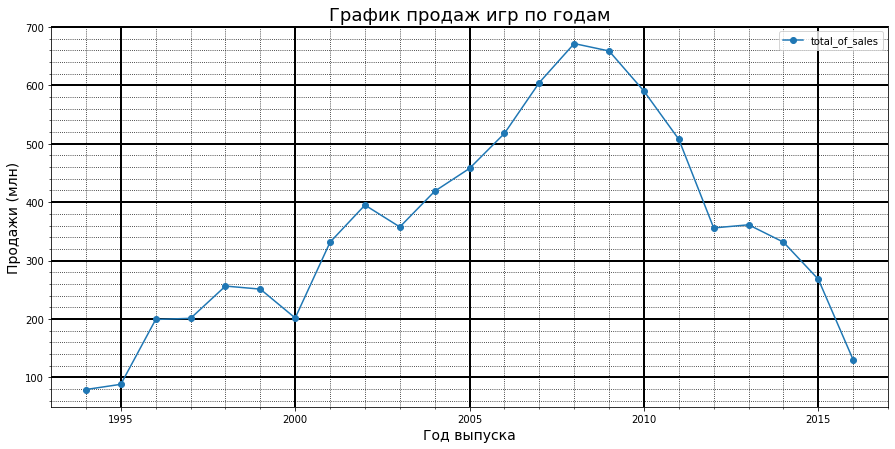

In [22]:
(data
 .pivot_table(index = 'year_of_release', values = 'total_of_sales', aggfunc = 'sum')
 .reset_index()
 .plot(x = 'year_of_release'
       , y  = 'total_of_sales'
       , style = 'o-'
       , xlim = (1993, 2017) 
       , figsize = (15,7)
       , grid = True ))

# Для наглядности включим второстепенное деление осей. 

plt.minorticks_on()

# Зададим внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k', 
        linewidth = 2)

# Зададим внешний вид линий вспомогательной сетки:
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.title('График продаж игр по годам', fontsize=18)
plt.xlabel("Год выпуска", fontsize=14)
plt.ylabel("Продажи (млн)", fontsize=14)

plt.show()

Да, вышло более чем наглядно. Кризис 2008 не обошёл и игровую индустрию. По всей видимости 2020, для этой индустрии, должен всё вернуть на круги своя)

*3.2. Оценка динамики продаж по платформам.* <a id="Step_3_2"></a>

Для корректной оценки динами продаж по платформам создадим новый датасет, который будет включать все необходимые параметры `year_of_release`, `platform`, `total_of_sales`.

In [23]:
sorted_data = (data
 .pivot_table(index = ['year_of_release', 'platform']
              , values = 'total_of_sales'
              , aggfunc = 'sum')
 .sort_values(by = ['year_of_release','total_of_sales'], ascending = [True, False]))

Посмотрим как по годам менялась первая пятёрка самых успешныхс точки зрения платформ.

In [24]:
for i in range (1994,2017):
    display(sorted_data.query('year_of_release == @i').head(5))

total_of_sales
year_of_release platform                
1994            SNES               35.08
                PC                 12.87
                GB                 12.18
                GEN                 8.13
                PS                  6.03

total_of_sales
year_of_release platform                
1995            PS                 35.96
                SNES               32.20
                SAT                11.57
                PC                  4.22
                GB                  3.60

total_of_sales
year_of_release platform                
1996            PS                 94.70
                GB                 36.03
                N64                34.10
                SNES               15.92
                PC                 10.58

total_of_sales
year_of_release platform                
1997            PS                136.17
                N64                39.50
                PC                 11.27
                SAT                 6.77
                GB                  6.37

total_of_sales
year_of_release platform                
1998            PS                169.49
                N64                49.24
                GB                 26.90
                SAT                 3.82
                DC                  3.38

total_of_sales
year_of_release platform                
1999            PS                144.53
                N64                57.87
                GB                 38.00
                DC                  5.16
                PC                  4.74

total_of_sales
year_of_release platform                
2000            PS                 96.37
                PS2                39.17
                N64                33.97
                GB                 19.76
                DC                  5.99

total_of_sales
year_of_release platform                
2001            PS2               166.43
                GBA                61.53
                PS                 35.59
                GC                 26.34
                XB                 22.26

total_of_sales
year_of_release platform                
2002            PS2               205.38
                GBA                74.16
                GC                 51.81
                XB                 48.01
                PC                  8.57

total_of_sales
year_of_release platform                
2003            PS2               184.31
                GBA                56.67
                XB                 55.04
                GC                 50.61
                PC                  8.84

total_of_sales
year_of_release platform                
2004            PS2               211.81
                GBA                77.91
                XB                 65.42
                GC                 28.82
                DS                 17.27

total_of_sales
year_of_release platform                
2005            PS2               160.66
                DS                130.14
                XB                 49.08
                PSP                43.84
                GBA                33.86

total_of_sales
year_of_release platform                
2006            Wii               137.15
                DS                119.81
                PS2               103.42
                PSP                55.32
                X360               51.62

total_of_sales
year_of_release platform                
2007            Wii               152.77
                DS                146.94
                X360               95.41
                PS2                75.99
                PS3                73.19

total_of_sales
year_of_release platform                
2008            Wii               171.32
                DS                145.31
                X360              135.26
                PS3               118.52
                PS2                53.90

total_of_sales
year_of_release platform                
2009            Wii               206.97
                PS3               130.93
                X360              120.29
                DS                119.54
                PSP                37.78

total_of_sales
year_of_release platform                
2010            X360              170.03
                PS3               142.17
                Wii               127.95
                DS                 85.02
                PSP                35.04

total_of_sales
year_of_release platform                
2011            PS3               156.78
                X360              143.84
                3DS                63.20
                Wii                59.65
                PC                 35.03

total_of_sales
year_of_release platform                
2012            PS3               107.36
                X360               99.74
                3DS                51.36
                PC                 23.22
                Wii                21.71

total_of_sales
year_of_release platform                
2013            PS3               113.25
                X360               88.58
                3DS                56.57
                PS4                25.99
                WiiU               21.65

total_of_sales
year_of_release platform                
2014            PS4               100.00
                XOne               54.07
                PS3                47.76
                3DS                43.76
                X360               34.74

total_of_sales
year_of_release platform                
2015            PS4               118.90
                XOne               60.14
                3DS                27.78
                PS3                16.82
                WiiU               16.35

total_of_sales
year_of_release platform                
2016            PS4                69.25
                XOne               26.15
                3DS                15.14
                PC                  5.25
                WiiU                4.60

Хорошо видно, что нет каких-то бесменных лидеров, в первую очередь благодаря прогрессу и выходу новых платформ. Видно, что и динамика продаж носит не линейный характер, а в последние годы дела так и вообще идут так себе.

Создадим таблицу с суммарными продажами для каждой платформы, чтобы выбрать 10 наиболее успешных из них.

In [25]:
top_10_platforms = (data
 .pivot_table(index = 'platform'
              , values = 'total_of_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'total_of_sales', ascending = False)
 .head(10)
 .reset_index())

In [26]:
display(top_10_platforms)

,platform,total_of_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Собственно, 10 наиболее успешных платформ с точки зрения продажи компьютерных игр. Забавно, что PC в этот список не попал, и, видимо, не последнюю роль в этом сыграли торренты и иже с ними) 

Построим график распределения продаж для этой десятки по годам.

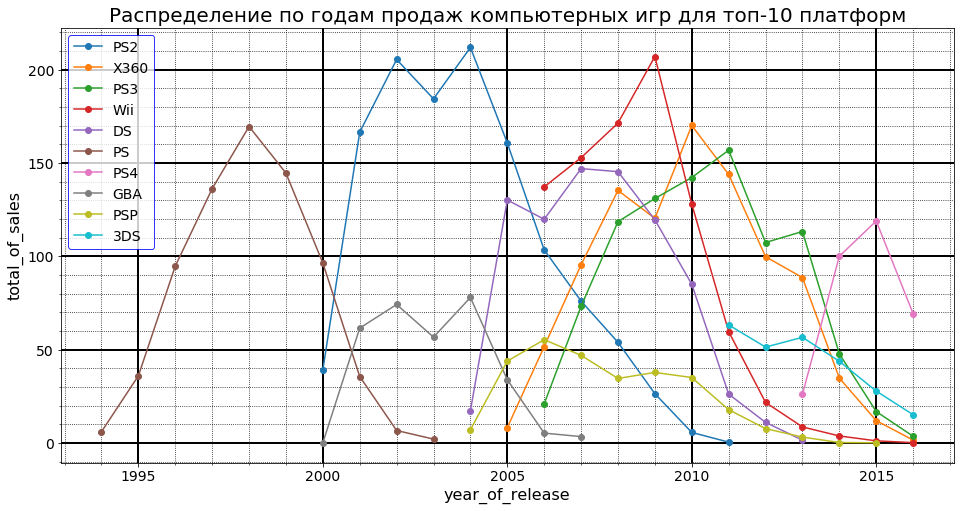

In [27]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

for i in top_10_platforms['platform']:
    
    x = sorted_data.reset_index().query('platform == @i')['year_of_release']
    y = sorted_data.reset_index().query('platform == @i')['total_of_sales']
    
    ax.plot(x, y, label = i, marker = 'o')

ax.legend(fontsize = 14, edgecolor = 'b')

plt.minorticks_on()

# Зададим внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k', 
        linewidth = 2)

# Зададим внешний вид линий вспомогательной сетки:
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax.tick_params(axis = 'both', labelsize = 14)

ax.set_xlabel('year_of_release', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

fig.set_figwidth(16)
fig.set_figheight(8)

plt.title('Распределение по годам продаж компьютерных игр для топ-10 платформ', fontsize = 20)

plt.show()

Анализируя график, можно с легкостью заметить, что у каждой платформы есть свой период славы: пик максимальных продаж компьютерных игр для неё. Да и не только славы, но и жизни как таковой. Из представленных выше платформ видно, что на подъём до максимального уровня продаж компьютерных игр уходит 4-5 лет. На уход со сцены - подольше - 6-8 лет.

*3.3. Определение актуального периода. Выбор нескольких потенциально прибыльных платформ.* <a id="Step_3_3"></a>

На основании предыдущего графика, мы сделали вывод, что выход на максимум по продажам игр для платформы, как правило, составляет 4-5 лет. С учётом того, что нам предстоит делать прогноз на 2017 год, за актуальный период примем интервал с 2012 по 2016.

Для выбора нескольких потенциально прибыльных платформ, определим наиболее успешные из них и построим график  аналогичный предыдущему для анализа динамики.

In [28]:
current_period_top_10_platforms = (data
                       .query('year_of_release  > 2011')
                       .pivot_table(index = 'platform'
                                    , values = 'total_of_sales'
                                    , aggfunc = 'sum')
                       .sort_values(by = 'total_of_sales', ascending = False)
                       .head(10)
                       .reset_index())

In [29]:
current_period_top_10_platforms

,platform,total_of_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Десятка лидеров несколько изменилась. Оценим визуально эти изменения с помощью графика.

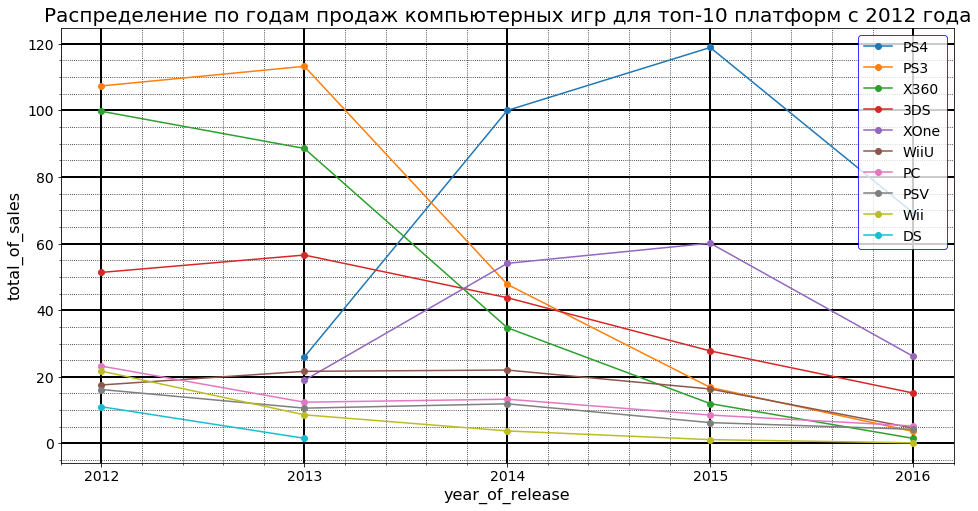

In [30]:
sorted_data_since_2012 = sorted_data.reset_index().query('year_of_release > 2011')

fig, ax = plt.subplots()

for i in current_period_top_10_platforms['platform']:
    
    x = (sorted_data_since_2012.query('platform == @i')['year_of_release'])
    y = (sorted_data_since_2012.query('platform == @i')['total_of_sales'])
    
    ax.plot(x, y, label = i, marker = 'o')

ax.legend(fontsize = 14, edgecolor = 'b')

plt.minorticks_on()

# Зададим внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k', 
        linewidth = 2)

# Зададим внешний вид линий вспомогательной сетки:
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax.tick_params(axis = 'both', labelsize = 14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_xlabel('year_of_release', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

fig.set_figwidth(16)
fig.set_figheight(8)

plt.title('Распределение по годам продаж компьютерных игр для топ-10 платформ c 2012 года'
          , fontsize = 20)

plt.show()

Итак. Проанализируем полученный результат.

Первое, на что хотелось бы обратить внимание, это 4 платформы: `PS4`,`PS3`,`XOne`, `X360`. Мы имеем дело с двумя сериями игровых консолей: `Playstaion` и `Xbox`. `PS4` это более новая, чем `PS3`, модель семейства `Playstaion`. `XOne` более новая, чем `X360`, модель семейства `Xbox`. На графике хорошо видно, что с момента появления новой линейки, продажи игр для старых моделей неуклонно снижаются, а для новых - растут. Снижение продаж в 2016 для `PS4`, `XOne`, далеко не факт, что является первым звоночком безальтернативно нисходящего тренда. На примере графика `Распределение по годам продаж компьютерных игр для топ-10 платформ` хорошо видно, что довольно часто на фоне общего роста, снижения показателей иногда случаются, в целом не меняя тренда. 

Остальные платформы имеют уверенное снижение результатов из года в год. В том числе и `3DS`, которая вроде бы и показала уверенное третье место за 2016 год, но с учётом предыдущих темпов падения, в 2017 году вероятней всего окажется в команде текущих аутсайдеров.

Да, от 1 млн до 5 млн это тоже не саме маленькие цифры, но если мы говорим о прогнозе будущих лидеров по количеству проданных игр, которые при этом могут ещё продемонстрировать и рост по сравнению с предыдущим годом, то это однозначно платформы `PS4`, `XOne`.

*3.4. Диаграмма размаха по глобальным продажам игр в разбивке по платформам.* <a id="Step_3_4"></a>

Возьмём топ 10 платформ и построим по ним диаграммы размаха. 

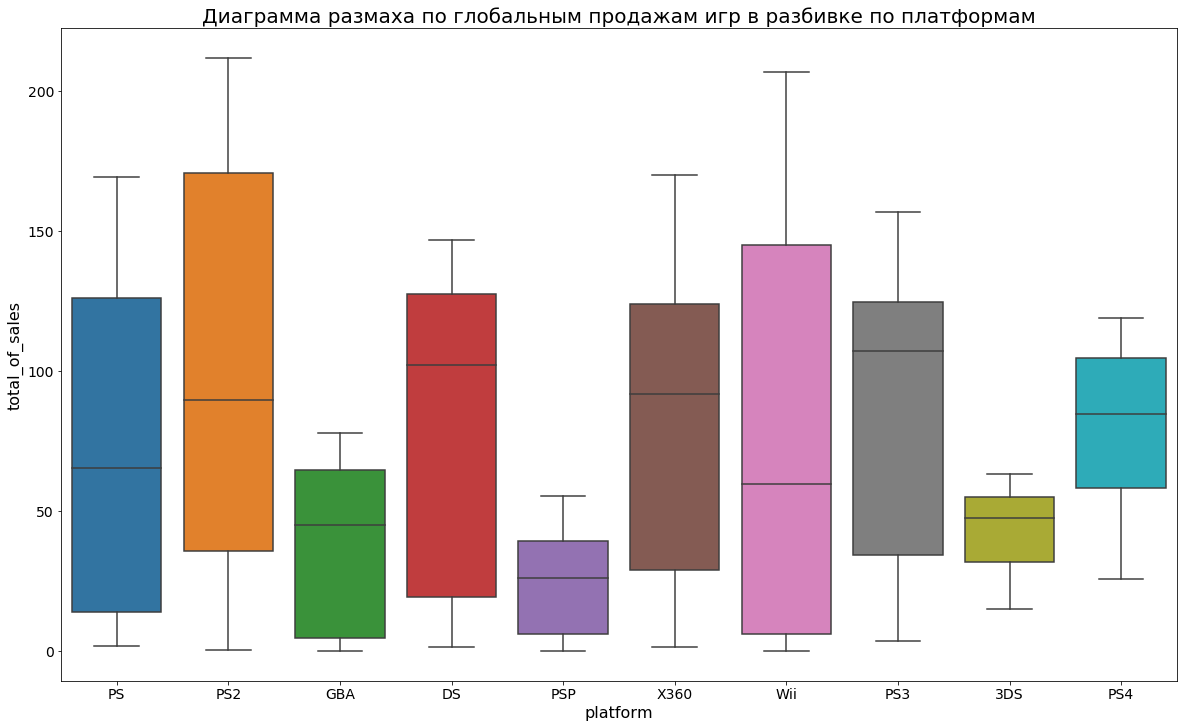

In [31]:
platforms = top_10_platforms['platform']
sorted_data_of_top_10 = sorted_data.reset_index().query('platform in @platforms')

fig, ax = plt.subplots(figsize=(20,12))

ax = sns.boxplot(x= "platform", y="total_of_sales", data = sorted_data_of_top_10)

ax.tick_params(axis = 'both', labelsize = 14)

ax.set_xlabel('platform', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам'
          , fontsize = 20)

plt.show()

Если анализировать результат на всём имеющемся интервале, который мы определили как значимый, то сразу хотелось бы выделить линейку `Playstation`. Все платформы, кроме `PSP`, выглядят крайне успешными, а самая новая весьма перспективной, учитывая количество лет, прошедших с момента запуска, и характер распределения количества игр на это временном интервале. 

Распределения для `DS`, `X360`, `Wii` тоже выглядят весьма неплохо. Медианный отметки находятся достаточно высоко, что говорит нам о хороших продажах более чем на половине всего интервала. 

`PSP`, `GBA`, `3DS` - аутсайдеры нашего рейтинга. Звёзд с неба не хватали, но держались уверен в своё диапазоне, что и позволило им по суммарному количеству продаж попасть в десятку лучших платформ.  

*Проведём аналогичный анализ для актуального интервала, что позволит нам также оценить распредление продаж по годам для более новых и перспективных платформ.*

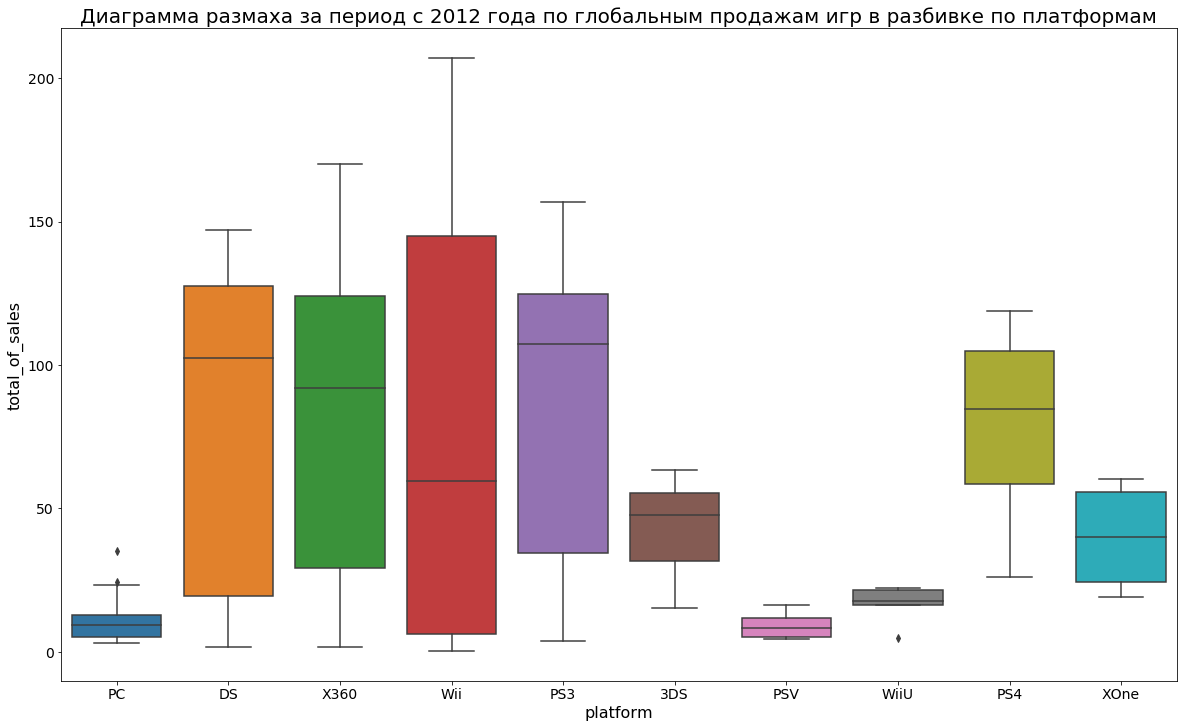

In [32]:
platforms = current_period_top_10_platforms['platform']
sorted_data_of_top_10 = sorted_data.reset_index().query('platform in @platforms')

fig, ax = plt.subplots(figsize=(20,12))

ax = sns.boxplot(x= "platform", y="total_of_sales", data = sorted_data_of_top_10)

ax.tick_params(axis = 'both', labelsize = 14)

ax.set_xlabel('platform', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

plt.title('Диаграмма размаха за период с 2012 года по глобальным продажам игр в разбивке по платформам'
          , fontsize = 20)

plt.show()

Из новичков у нас `PC`, `PSV`, `WiiU`, `XOne` по сравнению с полным периодом. 
И если про `PC`, `PSV`, `WiiU` сказать особо нечего, потому что их небольшой разброс обусловлен в первую очередь окончанием своего цикла жизни (разве что кроме `PC` - тут целевой диапазон выходит за пределы только лишь игровой индустрии), то `XOne`, благодаря своей относительной новизне, стоит немного особняком. Не самый плохой старт, небольшой разброс количества игр по годам, но явное отставание от своего основного конкурента ,`PS4`, с которым они появились и в один год и примерно с одного уровня проданных игр.

*3.5. Оценка влияния на продажи отзывов пользователей и критиков.* <a id="Step_3_5"></a>

За платформу, в рамках которой будем рассматривать влияние отзывов критиков и пользователей, возьмем `PS4`, как самую популярную за актуальный период и притом потенциально самую прибыльную, относительно продаж компьютерных игр, платформу на 2017 год. Создадим соотвествующий фрейм, в котором нас будут интересовать только строки с оценками.

Создадим фрейм для анализа данных за актуальный период (с 2012 по 2016).

In [33]:
data_curr = data.query('year_of_release > 2011')

In [34]:
data_PS4 = data_curr.query('platform == "PS4"').dropna(subset = ['critic_score','user_score'])

Построим диаграммы рассеяния для пар `critic_score` - `total_of_sales` и `user_score` -`total_of_sales`. 

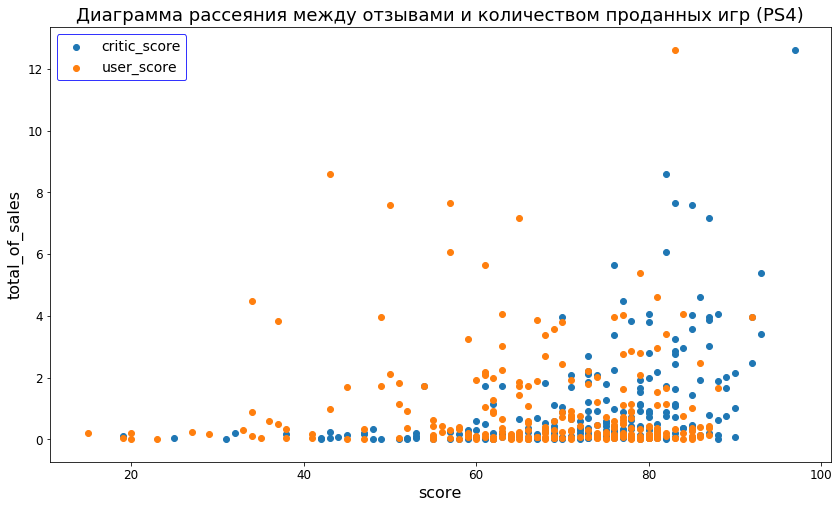

In [35]:
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter(data_PS4['critic_score'], data_PS4['total_of_sales'], label = 'critic_score')

# Для того, чтобы наглядно можно было сопоставить два рейтинга на одном графике, умножим 
# пользовательский рейтинг на 10.

ax.scatter(data_PS4['user_score']*10, data_PS4['total_of_sales'], label = 'user_score' )

ax.legend(fontsize = 14, edgecolor = 'b')

ax.tick_params(axis = 'both', labelsize = 12)

ax.set_xlabel('score', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

plt.title('Диаграмма рассеяния между отзывами и количеством проданных игр (PS4)'
          , fontsize = 18)

plt.show()

Как видно из графика: высокие оценки, что критиков, что пользователей далеко ещё не гарантия успеха. Оценки критиков при этом находятся чуть правее оценок пользователей. Это говорит нам о том, что критики склонны ставить рейтинг чуть выше чем пользователи.

Теперь посчитаем коэффициент Пирсона, чтобы получить более точную оценку взаимосвязи анализируемых параметров.

In [36]:
round(data_PS4['critic_score'].corr(data_PS4['total_of_sales']),2)

0.41

In [37]:
round(data_PS4['user_score'].corr(data_PS4['total_of_sales']),2)

-0.03

Коэффициенты Пирсона подтверждают наши выводы, сделанные на основе построенной диаграммы рассеяния. Для оценки критиков можно говорить о наличии определённого влияния на продажи. В случае с пользотелями не сильно погрешим против истины, если скажем, что какая-либо взаимосвязь с данными здесь отсутствует напрочь.

Для того, чтобы окончательно убедиться в справедливости сделанных выводов, проведём аналогичное исследование для платформ `XOne`, она хоть и не на высоте рейтинга, но является нашей второй перспективной платформой после `PS4` на 2017 год, и возьмём ещё `PS3`, занимающую 2-ое место в нашем `current_period_top_10_platforms`.

#### `XOne`

In [38]:
data_XOne = data_curr.query('platform == "XOne"').dropna(subset = ['critic_score'
                                                                   ,'user_score'])

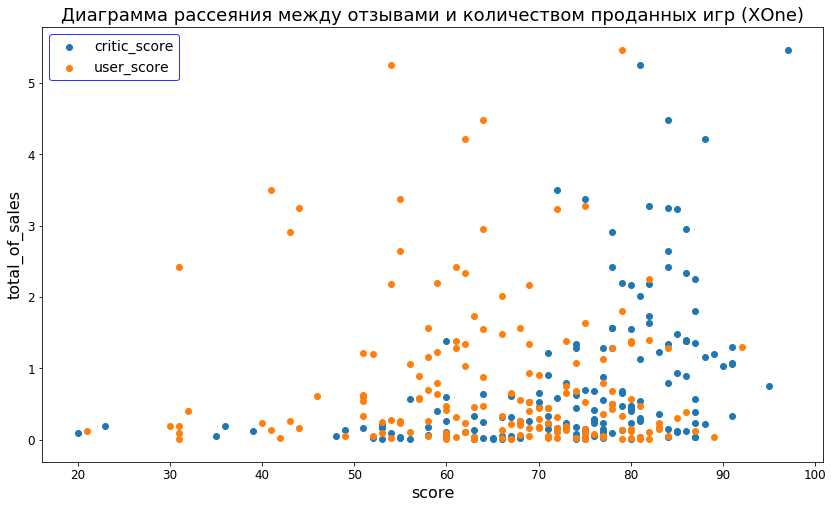

In [39]:
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter(data_XOne['critic_score'], data_XOne['total_of_sales'], label = 'critic_score')

# Для того, чтобы наглядно можно было сопоставить два рейтинга на одном графике, умножим 
# пользовательский рейтинг на 10.

ax.scatter(data_XOne['user_score']*10, data_XOne['total_of_sales'], label = 'user_score' )

ax.legend(fontsize = 14, edgecolor = 'b')

ax.tick_params(axis = 'both', labelsize = 12)

ax.set_xlabel('score', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

plt.title('Диаграмма рассеяния между отзывами и количеством проданных игр (XOne)'
          , fontsize = 18)

plt.show()

In [40]:
round(data_XOne['critic_score'] .corr(data_XOne['total_of_sales']),2)

0.41

In [41]:
round(data_XOne['user_score'] .corr(data_XOne['total_of_sales']),2)

-0.09

Для `XOne` с критиками всё также, а вот в случае с пользователями даже появилась, пусть и совершенно не большая, но всё же обратная корреляция.

#### `PS3`

In [42]:
data_PS3 = data_curr.query('platform == "PS3"').dropna(subset = ['critic_score'
                                                                 ,'user_score'])

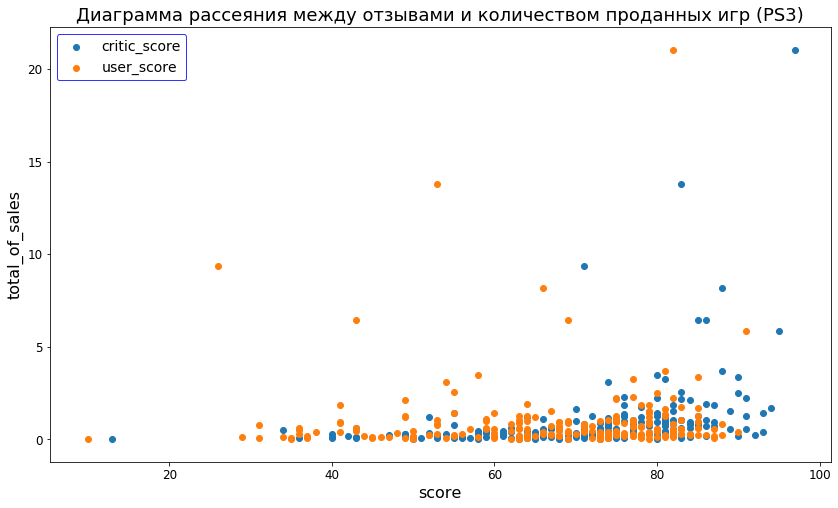

In [43]:
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter(data_PS3['critic_score'], data_PS3['total_of_sales'], label = 'critic_score')

# Для того, чтобы наглядно можно было сопоставить два рейтинга на одном графике, умножим 
# пользовательский рейтинг на 10.

ax.scatter(data_PS3['user_score']*10, data_PS3['total_of_sales'], label = 'user_score' )

ax.legend(fontsize = 14, edgecolor = 'b')

ax.tick_params(axis = 'both', labelsize = 12)

ax.set_xlabel('score', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

plt.title('Диаграмма рассеяния между отзывами и количеством проданных игр (PS3)'
          , fontsize = 18)

plt.show()

In [44]:
round(data_PS3['critic_score'] .corr(data_PS3['total_of_sales']),2)

0.33

In [45]:
round(data_PS3['user_score'] .corr(data_PS3['total_of_sales']),2)

0.0

И `PS3` не стала исключением. Всё плюс-минус в том же диапазоне.

Рассмотрев три платформы `PS4`, `XOne`, `PS3` на предмет наличия зависимости между продажами и оценкой, мы можем с уверенностью утверждать, что о какой-то корреляции и влиянии есть смысл говорить для оценки критиков `critic_score` и продаж `total_of_sales`, в случае же с оценками пользователей `user_score` и продажами `total_of_sales` о какой-либо взаимосвязи говорить не приходится. 

Остаётся, конечно, вопрос: то ли это компания выпускает стоящую игру и критики не редко попадают в рынок своей оценкой, то ли рынок попадает в критиков, частенько ориентируясь на их мнение) Скорее всего, как всегда, истина где-то посередине, со смещением чуть в сторону первой версии, судя по нашим данным) Тем не менее, я бы предложил компаниям не оставлять совсем без внимания, пусть и не то что бы сильно выдающийся, но всё таки рычаг, и с критиками на той или иной основе работать, так сказать) 

Мысль, что называется, на поверхности, но даже в рамках нашей работы сложно пройти мимо))

*3.7. Анализ распределения игр по жанрам.* <a id="Step_3_7"></a>

Оценим общее распределение игр по жанрам.

In [46]:
data_curr['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Лидеры и аутсайдеры налицо. Жанр `Action` явный фаворит, а если учесть его под-жанры `Shooter`, `Platform`, `Fighting`, то разрыв с ближайшими конкурентами становится более чем ощутимым, а как следствие этого - вкусы целевой аудитории, более понятными.

Далее оценим в такой же последовательности располагаются жанры по количеству проданных копий, как и по количеству выпущенных игр. 

In [47]:
genre_top = (data_curr
 .pivot_table(index = 'genre'
              , values = 'total_of_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'total_of_sales', ascending = False)
 .reset_index())

In [48]:
genre_top

,genre,total_of_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Из полученного списка видно, что много выпущенных игр, не всегда означает много проданных игр. Первая строчка не изменалась, там всё также жанр `Action`. Далее рейтинг притерпел некоторые изменения, но самым значительным подтверждением выдвинутого в начале тезиса является измение позиции жанра `Adventure`. С 3-ей позиции - почти в самый низ. Для сравнения на две строчки ниже стоящий в рейтинге по количеству выпущенных игр жанр `Shooter` , по количеству проданных копий занял второе место.

Проанализируем динамику изменения продаж по годам для самых популярных жанров. Возьмём первые 5 по продажам.

In [49]:
genre_top_5 = genre_top.head(5)

Сгруппируем исходные данные по жанрам и годам.

In [50]:
sorted_data_genre = (data_curr
 .pivot_table(index = ['year_of_release', 'genre']
              , values = 'total_of_sales'
              , aggfunc = 'sum')
 .sort_values(by = ['year_of_release','total_of_sales'], ascending = [True, False]))

Построим график изменения продаж для каждого жанра по годам.

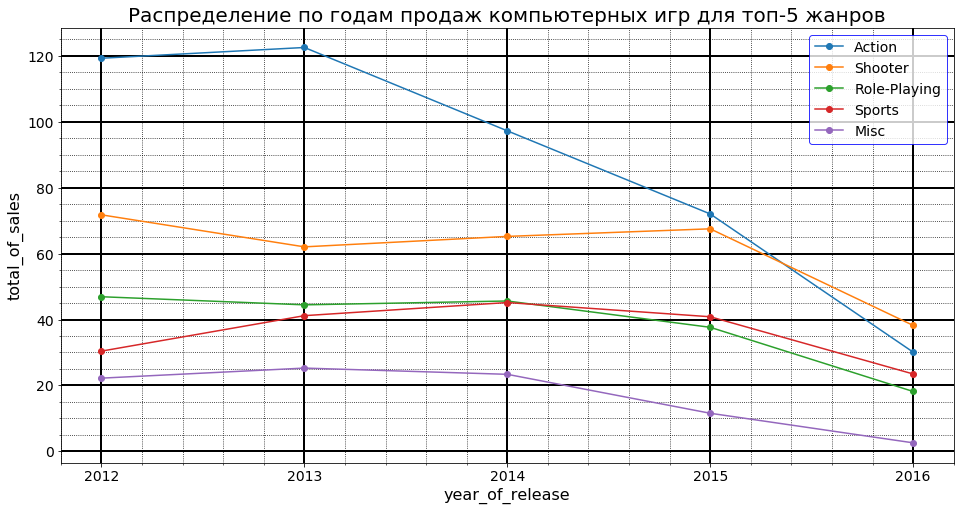

In [51]:
fig, ax = plt.subplots()

for i in genre_top_5['genre']:
    
    x = sorted_data_genre.reset_index().query('genre == @i')['year_of_release']
    y = sorted_data_genre.reset_index().query('genre == @i')['total_of_sales']
    
    ax.plot(x, y, label = i, marker = 'o')

ax.legend(fontsize = 14, edgecolor = 'b')

plt.minorticks_on()

# Зададим внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k', 
        linewidth = 2)

# Зададим внешний вид линий вспомогательной сетки:
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax.tick_params(axis = 'both', labelsize = 14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_xlabel('year_of_release', fontsize = 16)
ax.set_ylabel('total_of_sales', fontsize = 16)

fig.set_figwidth(16)
fig.set_figheight(8)

plt.title('Распределение по годам продаж компьютерных игр для топ-5 жанров', fontsize = 20)

plt.show()

Рассмотрим два потенциально наиболее прибыльных жанра: 
1. Жанр `Action`, который сильнее всех потерял в популярности за последние годы, но всё ещё находится достаточно высоко; 
2. И его под-жанр `Shooter`, который наоборот, за тот же временной интервал, не только уверенно сохранил набранные позиции, но и в 2016, на фоне общего спада, вышел в лидеры по продажам компьютерных игр.

#### Результат выполнения 3 шага "Анализ данных":
   1. *Произведена оценка количества игр, выпущенных в разные годы. Отмечен рост продаж копий до 2008 года и спад после.*
   2. *На основании анализа распределения по годам продаж компьютерных игр для каждой из платформ, сделали вывод, что цикл жизни платформы составлет как правило 10 - 13 лет, из которых 4-5 идут на подъём и достижение максимума продаж компьютерных игр, а 6-8 на постепенный спад этого показателя до полного прекращения поддержки данной платформы.*
   3. *Определили актуальный период для прогноза на 2017 год наиболее прибыльных платформ. Наиболее перспективными выглядят платформы `PS4` и `XOne`.*
   4. *Проанализировав данные по глобальным продажам игр в разбивке по платформам, сделали вывод, что линейка консолей `Playstation` является крайне успешной, за исключением `PSP`. Выдылели группу платформ с достойными показателями `DS`, `X360`, `Wii` и платформы со слабыми результатами `PSP`, `GBA`, `3DS`.
   5. *Для актуального периода выделили перспективные платформы `PS4`, `XOne`. Подчеркнули разницу в динамике продаж игр, после почти одинакового старта, как по времени (2013), так и по уровню продаж.* 
   6. *Анализ влияние отзывов на продажи игр показал почти полностью отсутствующую взаимосвязь между отзывами игроков и продажами, и не очень сильную, но тем не менее связь, в случае с отзывами критиков.*
   7. *Для метрики жанров было установлено, что большое количество выпущенных игр, далеко не гарантия большого количества игр проданных (жанр `Adventure` - наиболее яркий пример). Выделены наиболее перспективные жанры `Shooter` и `Action`.*

### Шаг 4. Составление портрета пользователя для каждого региона. <a id="Step_4"></a>

*4.1. Самые популярные платформы (топ-5). Различия в долях продаж.* <a id="Step_4_1"></a>

*Северная Америка `NA`.*

Посчитаем топ-5 самых популярных платформ для компьютерных игр.

In [52]:
top_5_platforms_NA = (data_curr
 .pivot_table(index = 'platform'
              , values = 'na_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .reset_index()
 .head(5))

In [53]:
top_5_platforms_NA

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


Теперь посчитаем долю каждой платформы относительно всего регионального рынка компьютерных игр.

In [54]:
na_sales_sum = data_curr['na_sales'].sum()

In [55]:
top_5_platforms_NA['share_of_sales']= round(
    (top_5_platforms_NA['na_sales'] / na_sales_sum),2)

In [56]:
top_5_platforms_NA

,platform,na_sales,share_of_sales
0,X360,140.05,0.24
1,PS4,108.74,0.18
2,PS3,103.38,0.17
3,XOne,93.12,0.16
4,3DS,55.31,0.09


Предпочтения игроков Северной Америки в региональном масштабе вполне наглядно демонстрирует полученная таблица.

*Европа `EU`.*

Произведём полностью аналогичные расчёты.

In [57]:
top_5_platforms_EU = (data_curr
 .pivot_table(index = 'platform'
              , values = 'eu_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
 .reset_index()
 .head(5))

In [58]:
top_5_platforms_EU

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [59]:
eu_sales_sum = data_curr['eu_sales'].sum()

In [60]:
top_5_platforms_EU['share_of_sales']= round(
    (top_5_platforms_EU['eu_sales'] / eu_sales_sum),2)

In [61]:
top_5_platforms_EU

,platform,eu_sales,share_of_sales
0,PS4,141.09,0.28
1,PS3,106.86,0.21
2,X360,74.52,0.15
3,XOne,51.59,0.10
4,3DS,42.64,0.08


В Европе лидеры распределены несколько иначе, но состав тот же.

*Япония `JP`*.

In [62]:
top_5_platforms_JP = (data_curr
 .pivot_table(index = 'platform'
              , values = 'jp_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
 .reset_index()
 .head(5))

In [63]:
top_5_platforms_JP

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [64]:
jp_sales_sum = data_curr['jp_sales'].sum()

In [65]:
top_5_platforms_JP['share_of_sales']= round(
    (top_5_platforms_JP['jp_sales'] / jp_sales_sum),2)

Для большей наглядности и простоты анализа выведем все три таблицы.

Северная Америка `NA`. 

In [66]:
top_5_platforms_NA

,platform,na_sales,share_of_sales
0,X360,140.05,0.24
1,PS4,108.74,0.18
2,PS3,103.38,0.17
3,XOne,93.12,0.16
4,3DS,55.31,0.09


Европа `EU`.

In [67]:
top_5_platforms_EU

,platform,eu_sales,share_of_sales
0,PS4,141.09,0.28
1,PS3,106.86,0.21
2,X360,74.52,0.15
3,XOne,51.59,0.10
4,3DS,42.64,0.08


Япония `JP`.

In [68]:
top_5_platforms_JP

,platform,jp_sales,share_of_sales
0,3DS,87.79,0.46
1,PS3,35.29,0.18
2,PSV,21.04,0.11
3,PS4,15.96,0.08
4,WiiU,13.01,0.07


Да, лидеры среди платформ по продажам компьютерных игр от региона к региону отличаются. Это отчётливо видно из представленных таблиц. В очередной раз стоит отметить, что семейство консолей `Plastation` чувствует себя крайне неплохо в каждом регионе, в Европе при этом занимая 1-ое и 2-ое места. Самым ёмким рынком из представленных выглядит американский, самым незначительным -  японский (относительно, конечно). На первую пятёрку платформ для Америки и Европы приходится более 70% продаж, а для Японии этот показатель и вовсе составляет 90%! Также, в случае Японии, нельзя обойти стороной популярность платформы `3DS`, для которой продаётся почти в 2,5 раза игр больше, чем для платформы ближайшего конкурента.

*4.2. Самые популярные жанры (топ-5). Оценка разницы.* <a id="Step_4_2"></a>

В прерыдущем разделе мы считали доли продаж относительно видов платформ, теперь проделаем тоже самое с жанрами.

*Северная Америка `NA`.*

Посчитаем топ-5 самых популярных жанров для компьютерных игр.

In [69]:
top_5_genre_NA = (data_curr
 .pivot_table(index = 'genre'
              , values = 'na_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .reset_index()
 .head(5))

In [70]:
top_5_genre_NA

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Теперь посчитаем долю каждого жанра относительно всего регионального рынка компьютерных игр.

In [71]:
top_5_genre_NA['share_of_sales']= round(
    (top_5_genre_NA['na_sales'] / na_sales_sum),2)

In [72]:
top_5_genre_NA

,genre,na_sales,share_of_sales
0,Action,177.84,0.30
1,Shooter,144.77,0.24
2,Sports,81.53,0.14
3,Role-Playing,64.00,0.11
4,Misc,38.19,0.06


Европа `EU`.

In [73]:
top_5_genre_EU = (data_curr
 .pivot_table(index = 'genre'
              , values = 'eu_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
 .reset_index()
 .head(5))

In [74]:
top_5_genre_EU

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [75]:
top_5_genre_EU['share_of_sales']= round(
    (top_5_genre_EU['eu_sales'] / eu_sales_sum),2)

In [76]:
top_5_genre_EU

,genre,eu_sales,share_of_sales
0,Action,159.34,0.31
1,Shooter,113.47,0.22
2,Sports,69.09,0.14
3,Role-Playing,48.53,0.10
4,Racing,27.29,0.05


Почти идентично американскому региону.

Япония `JP`.

In [77]:
top_5_genre_JP = (data_curr
 .pivot_table(index = 'genre'
              , values = 'jp_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
 .reset_index()
 .head(5))

In [78]:
top_5_genre_JP

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


In [79]:
top_5_genre_JP['share_of_sales']= round(
    (top_5_genre_JP['jp_sales'] / jp_sales_sum),2)

Выведем все три таблицы для каждого региона.

Северная Америка `NA`.

In [80]:
top_5_genre_NA

,genre,na_sales,share_of_sales
0,Action,177.84,0.30
1,Shooter,144.77,0.24
2,Sports,81.53,0.14
3,Role-Playing,64.00,0.11
4,Misc,38.19,0.06


Европа `EU`.

In [81]:
top_5_genre_EU

,genre,eu_sales,share_of_sales
0,Action,159.34,0.31
1,Shooter,113.47,0.22
2,Sports,69.09,0.14
3,Role-Playing,48.53,0.10
4,Racing,27.29,0.05


Япония `JP`.

In [82]:
top_5_genre_JP

,genre,jp_sales,share_of_sales
0,Role-Playing,65.44,0.34
1,Action,52.80,0.27
2,Misc,12.86,0.07
3,Simulation,10.41,0.05
4,Fighting,9.44,0.05


Для Америки и Европы отношение в долях первой пятёрки практически идентичное, а лидерами в обоих случаях являются `Shooter` и `Action`. А вот в Японии своя атмосфера, и тут на передний план выходит жанр `Role-Playing` он же `RPG`, уверенное второе место занимает жанр`Action`. Также стоит отметить, что на долю первых двух жанров, для каждого из регионов, приходится более 50% от числа всех проданных игр.

Можно предположить, что такое положение дел для Японии объясняется через не самый простой психологический климат, жестко завязанный на традициях и в целом специфике устройства японского социума. А игры жанра `RPG`, которым свойственна система развития персонажа аналогичная в каком-то смысле жизни реального человека, скорее своей концепцией и структурой, позволяют этот момент компенсировать не без внутренней психологической ассоциации: успехи и признание не в реальной, но в виртуальной жизни. Не то что бы это специфика `RPG` только для Японии, но судя по цифрам, здесь этот вопрос крайне актуален. 

*4.3. Влияние рейтинга ESRB на продажи в отдельном регионе.* <a id="Step_4_3"></a>

Для анализа рейтинга ESRB на продажи по регионам сгрупируем данные соответствующим образом. Пропуски рейтинга заменим на значение `NR` - no rating (слишком много пропущенных значений, чтобы просто их проигнорировать).

In [83]:
data_for_ESRB = data_curr.fillna('NR')

Посмотрим, какой рейтинг у нас в принципе встречается.  

In [84]:
data_for_ESRB['rating'].value_counts()

NR      1275
M        498
T        412
E        394
E10+     306
Name: rating, dtype: int64

Обозначения рейтинга расшифровываются следующим образом: 

* `E` - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше;
* `E10+` - («Everyone 10 and older») —«Для всех от 10 лет и старше;
* `T` - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше;
* `M` - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;
* `NR` - («No rating») - «нет рейтинга»: Сокращение, позволяющие выделить игры без рейтинга. 

Приступим к непосредственному анализу влияния рейтинга на продажи для каждого из регионов.

Северная Америка `NA`.

In [85]:
rating_and_sales_NA = (data_for_ESRB
 .pivot_table(index = 'rating'
              , values = 'na_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .reset_index())

In [86]:
rating_and_sales_NA

,rating,na_sales
0,M,231.57
1,E,114.37
2,NR,103.31
3,E10+,75.70
4,T,66.02


Европа `EU`.

In [87]:
rating_and_sales_EU = (data_for_ESRB
 .pivot_table(index = 'rating'
              , values = 'eu_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
 .reset_index())

In [88]:
rating_and_sales_EU

,rating,eu_sales
0,M,193.96
1,E,113.03
2,NR,91.50
3,E10+,55.37
4,T,52.96


Япония `JP`.

In [89]:
rating_and_sales_JP = (data_for_ESRB
 .pivot_table(index = 'rating'
              , values = 'jp_sales'
              , aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
 .reset_index())

In [90]:
rating_and_sales_JP

,rating,jp_sales
0,NR,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


И снова у нас единодушие Америки и Европы, в противовес своим взглядам на мир игроков японского региона.
В случае первых двух говорить о каком-то влиянии рейтинга `ESRB` не приходится от слова совсем. Тут уверенно первое место занимают игры 17+. Следовательно, ставку стоит делать на контент и целевую аудиторию. 

Да, в Японии некоторая зависимость вроде бы прослеживается, но она, во-первых, не то что бы очень внушительная, во-вторых такое количество отсутствующих значений не даёт нам право воспользоваться даже этим данными.

Что касается, так называемых, игр без рейтинга `NR`, которые в свою очередь составляют внушительную часть наших данных, а в Японии так вообще с большим отрывом находятся на первом месте, то 'так называемые' они в первую очередь потому, что отсутствие рейтинга в рамках `ESRB` совершенно не означает его отсуствие в принципе. Просто исходя из того, что `ESRB` это не единственная организация, которая может присваивать рейтинг. 

Поэтому в реальной ситуации, для Европы и Америки можно было бы оставить всё как есть, а вот делать какие-то выводы для японского рынка, с таким количеством пропусков, мягко говоря, не совсем корректно. И если бы мы захотели наверняка убедиться в аналогичности ситуации американским и европейским рынка, то пришлось бы найти рейтинг других организаций и привести всё к общему знаменателю.

### Шаг 5. Проверка гипотез. <a id="Step_5"></a>

*5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.* <a id="Step_5_1"></a>

Проверку гипотезы проведём через T-критерий Стьюдента.

За нулевую гипотезу `Н_0` примем, что пользовательские рейтинги для платформ `XOne` и `PC` одинаковые.

За альтернативную гипотезу `Н_1` примем обратное утверждение.

Установим уровень критической значимости как `alpha = .05`

Чтобы понять, какое значение присвоить параметру `equal_var`, произведём оценку дисперсии для каждой выборки. Создадим соответствующий фрейм для работы.

In [91]:
data_for_hip = (data_curr
          .dropna(subset = ['user_score'])
          .reset_index(drop = True))

In [92]:
print(round((data_for_hip.query('platform == "XOne"')['user_score'].var()),3))
print(round((data_for_hip.query('platform == "PC"')['user_score'].var()),3))

1.907
2.77


Примем `equal_var` равным True.

In [93]:
alpha = 0.05

results =  st.ttest_ind(
    data_for_hip.query('platform == "XOne"')['user_score'], 
    data_for_hip.query('platform == "PC"')['user_score'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


По результатам теста Стьюдента нулевую гипотезу не отвергаем. То есть средние пользовательские рейтинги платформ Xbox One и PC между собой равны.

*5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.* <a id="Step_5_2"></a>

Проверку гипотезы проведём также через T-критерий Стьюдента.

За нулевую гипотезу `Н_0` примем, что средние пользовательские рейтинги для жанров `Action` и `Sports` равны.

За альтернативную гипотезу `Н_1` примем обратное утверждение.

Установим уровень критической значимости как `alpha = .05`

Чтобы понять, какое значение присвоить параметру `equal_var`, произведём оценку дисперсии для каждой выборки. 

In [94]:
print(round((data_for_hip.query('genre == "Action"')['user_score'].var()),3))
print(round((data_for_hip.query('genre == "Sports"')['user_score'].var()),3))

1.889
3.039


Примем `equal_var` равным True. 

In [95]:
alpha = 0.05

results =  st.ttest_ind(
    data_for_hip.query('genre == "Action"')['user_score'], 
    data_for_hip.query('genre == "Sports"')['user_score'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Исходя из результатов теста, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports не равны.

### Шаг 6. Общий вывод. <a id="Step_6"></a>

Итак. Наша основная задача попытаться установить принципы, на основании которых можно было бы сделать прогноз на следующий год, исходя из имеющейся информации о годах прошедших.

Попробуем сформулировать эти принципы, проанализировав и собрав воедино полученные результаты.

Первыми нашими шагами на пути к выполнению поставленной задачи являлись: загрузка, обзор, описание и подготовка данных. Все необходимые предпосылки для дальнейшей работы были сформированы.

Непосредственно анализ данных и составление портрета пользователя для каждого региона позволили нам получить следующие результаты, на основании которых можно построить как систему прогноза в целом, так и дать конкретные советы бизнесу в частности: 

1. Первое, что следует оценить - это репрезентативные свойства имеющейся выборки. Если у нас в одни годы продаётся 1000+ игр, а в другие не дотягивает и до 100, то стоит задуматься о границе, ниже которой рассматривать данные за год не имеет смысла. В нашем случае мы установили границу в 100 игр и продолжили анализ, отбросив все данные старше 1994. 
2. Далее, не лишним будет построить динамику продаж для глобального рынка, чтобы в целом понимать как общую картину на протяжении имеющегося интервала, так и то, в рамках какого тренда мы находимся на данный момент. Конректно в нашем случае легко заметить переломную точку в 2008 году. До неё - восходящий тренд, после - нисходящий.
3. На основании анализа распределения по годам продаж компьютерных игр для каждой из платформ, удалось установить, что цикл жизни платформы составлет как правило 10 - 13 лет, из которых 4-5 идут на подъём и достижение максимума продаж компьютерных игр, а 6-8 на постепенный спад этого показателя до полного прекращения поддержки данной платформы. То есть, если с общих позиций оценивать для каких платформ продажа игр вероятней всего будет идти веселее в прогнозируемые период, то нужно брать интервал в 3-4 года до этого момента (чтобы оставался предполагаемый запас для потенциального роста). Конечно, с оговоркой на анализ общей динамики для каждой конкретной платформы. В нашем случае, для прогноза на 2017 год, наиболее перспективными, несмотря на некоторый спад, выглядят `PS4` и `XOne`.
4. Также, при анализе стоит обращать внимание на принадлежность платформы к той или иной линейке, это, как и многое из того, что здесь есть, ещё не гарантия, но тоже признак. Яркий пример линейка консолей `Playstation`. Каждая модель, за исключением `PSP` (вероятней всего развитие смартфонов внесло свою не самую положительную лепту в ситуацию с продажами для этой и аналогичных ей платформ), продемонстрировала и демонстрирует весьма внушительные показатели. Для `PS2`, например, вообще продано больше всего игр за свю историю сущестования платформ. A `PS4` и `PS3` занимают 1-ое и 2-ое места по продажам игр соответственно за выбранными нами для анализа актуальный период.
5. Следующим параметром, на который всё таки стоит обратить внимание, это влияние оценки критиков на количество продаж. Наше исследование показывает, что в случае пользователей влияние на продажи стремится к нулю, а вот критики, пусть и не решающую, но всё таки свою роль играют. Другими словами, высокий рейтинг критиков для предполгаемых к продажам игр лишним не будет точно. 
6. Если мы говорим о жанрах и предпочтениях целевой аудитории, то неплохо было бы соотносить динамику предыдущего периода с регионом, в котором планируется осуществлять продажи. Это повысило бы вероятность успеха относительно продаж той или иной игры. В рамках предоставленных данных выделяются 2 наиболее популярных жанра `Action` и `Shooter` для Америки и Европы, а для Японии это будут жанр `RPG` и `Action`. Для каждого из регионов на первую двойку приходится более половины всех продаж.
7. При выборе: игры каких платформ вероятней будут продаваться успешней всего? Стоит оценивать данные не только за прошлые годы, но и делать это с поправкой на регион. Из анализа видно, что в целом, неплохо было бы попадать в топ-5 платформ для выбранного региона, потому что на них, как правило, приходится от 70 % до 90%  от всего объёма проданных игр.
8. И наконец рейтинг ESRB. Анализ полученной информации показывает, что делать ставку на принцип: "ниже ограничения - выше количество потенциальных покупателей", - было бы ошибкой. Скорее качество контента, хорошее понимание своей целевой аудитории и соотвествующая рекламная компания, будут в большей степени сопутствовать коммерческому успеху, чем какие-то ни было возрастные ограничения либо их отсуствие. Исключением, правда, при дополнительном сборе данных, гипотетически могла бы стать Япония, но в нашем случае это остаётся под вопросом.  

Хотелось бы отметить, что только комплексный, системный анализ описанных выше параметров и закономерностей позволит построить и сбалансировать модель, благодаря которой, опираясь на возможности магазина/бизнеса, можно было бы с высокой степенью вероятности спрогнозировать наиболее удачное решение относительно поставки и рекламы для тех или иных игр в том или ином регионе. 

Попробуем создать такую модель для каждого из регионов.

#### Северная Америка `NA` и Европа `EU`.

Здесь будет вестись речь как минимум о двух крупных рекламных компания разделённых по моделям платформ: 

1. Игры для платформы `PS4`.
2. Игры для платформы `XOne`. 

Причём в большей степени, возможно пропорционально динамики продаж прошлых лет, то есть почти в 2 раза, я рекомендовал бы, сделать упор на `PS4`.

Совсем забывать про остальные платформы из первой пятёрки я бы не стал. Акции, скидки, выбор наиболее популярных игр прошлых лет, другими словами что-то выжать из `X360`, `PS3`, `3DS` стоило попытаться. Но, конечно, основной бюджет - на лидеров.

Высокий рейтинг критиков был бы не лишний. Если игра не новая и есть данные динамики за прошлые годы, то смотрел бы в первую очерель на них. Так как рейтинг, это далеко не определяющая составляющая успеха.

Что касается жанров, то вероятней всего, в каждом из них есть свои звёзды, про которые нельзя забывать не в коем случае. Но именно для этого региона, массово я бы делал ставку на `Action` и `Shooter` в первую очередь. Во втором эшелоне шли бы `Sports`, `RPG` и `Misc`.

Единственное, что для Европы я бы рекомендова вместое `Misc` включить во второй эшелон `Racing`.

Итого, топ-1 для прогноза на 2017 год будет игра на `PS4`, жанра `Action` с высоким рейтингом критиков.

#### Япония `JP`.

Для японского региона стоит выбрать следующих флагманов среди платформ: 

1. `PS4` - как наиболее перспективную. 
2. `3DS` - как невероятно популярную в Японии.
3. `XOne` - существенно менее перспективную, чем `PS4`, но всё же способную, за счёт ребалансировки рынка, забрать своё у теряющих популярность платформ и войти в первую пятёрку.

Второй эшелон здесь будут представлять `PS3`, `PSV`, `WiiU` в формате аналогичном Европе и Америки.

Подход к рейтингу критиков - аналогичный.

Жанры: основной ресурс на `RPG` и `Action`. 

`Misc`, `Simulation`, `Fighting` - по остаточному принципу. 

Что касается рейтинга ESRB, то именно для Японии , я бы рекомендовал получить более полные данные, и если иерархия, имеющаяся на данный момент, подтвердиться, а разрыв увеличиться, то несколько сместить выбор в сторону игр с рейтингом `E` и `T`.

Для Японии, игры, которые веротней всего будут продаваться лучше остальных, имеют следующие параметры: платформа `PS4`, жанр `RPG`, высокий рейтинг критиков и, возможно, при оговорённых выше условиях, рейтинг `ESRB` (иили аналогичный ему)  уровня `E`. 